In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
states = ["A", "B", "C", "D"]
actions = ["left", "right", "pickup"]

In [3]:
rewards = {
    "A": {"left": -1, "right": 0, "pickup": 10},
    "B": {"left": -1, "right": 1, "pickup": -1},
    "C": {"left": 0, "right": 1, "pickup": -1},
    "D": {"left": 1, "right": -1, "pickup": 10},
}

In [4]:
q_table = {state: {action: 0 for action in actions} for state in states}
value_function = {state: 0 for state in states}
all_value_functions = []

In [5]:
alpha = 0.1
gamma = 0.9
epsilon = 0.2
num_episodes = 1000

In [6]:
for episode in range(num_episodes):
    state = random.choice(states)
    done = False
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = random.choice(actions)
        else:
            action = max(q_table[state], key=q_table[state].get)

        reward = rewards[state][action]

        if action == "left":
            next_state = states[max(0, states.index(state) - 1)]
        elif action == "right":
            next_state = states[min(len(states) - 1, states.index(state) + 1)]
        else:
            next_state = state
            done = True

        q_table[state][action] = q_table[state][action] + alpha * (
            reward + gamma * max(q_table[next_state].values()) - q_table[state][action]
        )

        value_function[state] = max(q_table[state].values())
        state = next_state

    all_value_functions.append(value_function.copy())

In [7]:
def get_optimal_policy(q_table):
    policy = {}
    for state in q_table:
        policy[state] = max(q_table[state], key=q_table[state].get)
    return policy

optimal_policy = get_optimal_policy(q_table)

In [10]:
def draw_policy(policy):
    fig, ax = plt.subplots()
    positions = {"A": 0, "B": 1, "C": 2, "D": 3}
    arrows = {"left": "←", "right": "→", "pickup": "↑"}
    for state, action in policy.items():
        ax.text(positions[state], 0, arrows[action], fontsize=20, ha='center', va='center')
    ax.set_xlim(-0.5, 3.5)
    ax.set_ylim(-0.5, 0.5)
    ax.set_xticks(range(4))
    ax.set_xticklabels(states)
    ax.set_yticks([])
    ax.set_title("Optimal Policy for Recycling Robot")
    plt.show()

Optimal Policy:
State A: pickup
State B: right
State C: right
State D: pickup


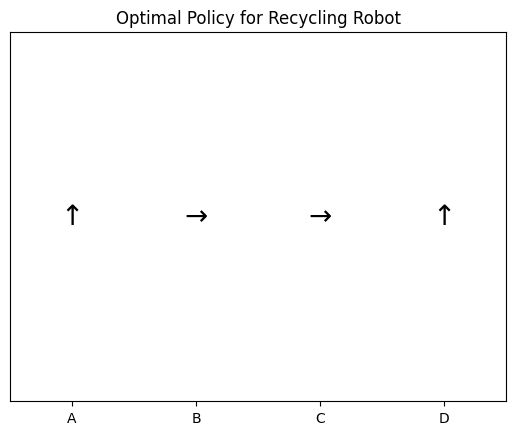


State Value Function at Each Episode:
Episode 1: {'A': 0.0, 'B': 0.274003561, 'C': 0.047405930490000005, 'D': 0}
Episode 2: {'A': 0.0, 'B': 0.35266251411379, 'C': 0.5944949923758444, 'D': 1.0474575188196147}
Episode 3: {'A': 0.0, 'B': 0.35266251411379, 'C': 0.7293166698320253, 'D': 2.0369829436314184}
Episode 4: {'A': 0.0317396262702411, 'B': 0.35266251411379, 'C': 0.7293166698320253, 'D': 2.0369829436314184}
Episode 5: {'A': 0.0317396262702411, 'B': 0.35266251411379, 'C': 0.7293166698320253, 'D': 3.0166131141951045}
Episode 6: {'A': 0.0317396262702411, 'B': 0.35266251411379, 'C': 1.0278801831263822, 'D': 3.9864469830531535}
Episode 7: {'A': 0.0317396262702411, 'B': 0.35266251411379, 'C': 1.3838723932885277, 'D': 4.946582513222622}
Episode 8: {'A': 0.0317396262702411, 'B': 0.35266251411379, 'C': 1.790677580149711, 'D': 5.897116688090396}
Episode 9: {'A': 0.0317396262702411, 'B': 0.35266251411379, 'C': 1.790677580149711, 'D': 6.838145521209492}
Episode 10: {'A': 0.0317396262702411, 'B'

In [11]:
print("Optimal Policy:")
for state, action in optimal_policy.items():
    print(f"State {state}: {action}")

draw_policy(optimal_policy)

print("\nState Value Function at Each Episode:")
for episode, vf in enumerate(all_value_functions):
    print(f"Episode {episode + 1}: {vf}")